### Mean Line Plotter

A script to plots the average of a number of other line graphs, which sit in the background. 

Allows for normalisation and rolling averaging.

In [5]:
import pandas as pd
import plotly.graph_objects as go

In [6]:
def uniPlotter(df, cols, xcol, number_type, rolling_averaging, title_top, title_bottom):
    
    # Compiling and calculating
    
    number_type_for_title = number_type
    
    if number_type == 'normalised':  
        number_type_for_title = 'normalised'

    all_cols = xcol.copy()
    all_cols.extend(cols)    
    df = df[all_cols].copy().fillna(0)
    
    for col in cols:
        
        df[col] = df[col].rolling(rolling_averaging, win_type='triang').mean()
            
        if number_type == 'raw':
            M = 1
        elif number_type == 'normalised':
            M = df[col].max()  
         
        df[col] = df[col] / M * 100
        
    df['Average'] = df[cols].mean(axis=1)
          
    
    # Plotting    
        
    fig = go.Figure()
    
    # Background lines
    for col in cols:
        if col != xcol[0]:
            fig.add_trace(
                go.Scatter(x=df['YMD'], y=df[col].apply(lambda x:round(x,0)), name=col, hovertemplate = f'<b>{col}: </b>' + '<b>%{y}</b><br>%{x}<extra></extra>', line=dict(width=1.5), opacity=0.5, line_color="#DCDCDC"),
            )
        
    # Average line
    fig.add_trace(
            go.Scatter(x=df['YMD'], y=df['Average'].apply(lambda x:round(x,0)), name='Average', hovertemplate = f'<b>Average: </b>' + ' <b>%{y}</b><br>%{x}<extra></extra>', line=dict(width=3), line_color="#181818"),
        )
    
    # Layout
    
    fig['layout'].update(margin=dict(l=0,r=0,b=0,t=40))
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.update_layout(font_family="Arial", font_color="#181818", font_size=12)
    
    fig.update_layout(title_text=f"<b>{title_top}</b><br><sup>{title_bottom} ({number_type_for_title}, {rolling_averaging}-day average)</sup>")
    fig.update_layout(title={"x": 0, "y" : 0.96, "yanchor" : "bottom", "xanchor" : "left"})
    
    fig.update_xaxes(showline=True,  gridwidth=1, gridcolor='#f5f5f5', tickangle=0, tickfont=dict(family='Consolas', size=12))
    fig.update_yaxes(showline=False, showgrid=True,gridwidth=1, gridcolor='#f5f5f5', tickfont=dict(family='Consolas', size=12))
    
    fig.update_layout(showlegend=False) # Knowing the individual background lines in not that important, but names are revealed in rollover in any case
        
    ### fig.write_html()
    
    fig.show()

In [7]:
# The DF to use 
df = pd.read_csv('CSVs/matrices/basic_daily_airport_traffic_matrix_raw.csv')

# The columns you want lines from    
cols = ['YBGD', 'YNRV',  'YCAI', 'YROT', 'YDME', 'YKBL', 'YWLU', 'YFOR']   

# column for x axis (list, not variable)
xcol = ['YMD']

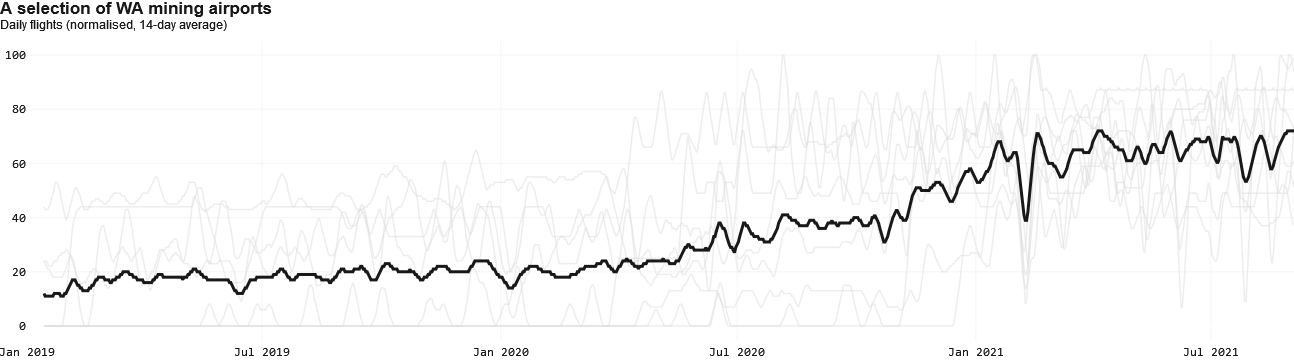

In [8]:
uniPlotter(df, cols, xcol, 'normalised', 14, 'A selection of WA mining airports', 'Daily flights')